<a href="https://colab.research.google.com/github/pranukrish/CMPE258_DeepLearning/blob/main/Assignment4/RegularizationTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Aim: Illustrate use of various activation functions, dropouts, learning rate schedulers , regularization techniques like gradient clipping, batch normalization, early stopping, l1 and l2 regularizations, optimizers on simple data set**

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import tensorflow as tf
from tensorflow import keras
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [ ]:
# Dense layer with "Relu " activation
keras.layers.Dense(20, activation="relu", kernel_initializer="he_normal")

###Activation functions over Fasion-MNIST dataset

---
1) PReLu


In [ ]:
#Loading the dataset into validation and training sets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0 # Scaling the data 
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
# Creating the sequential model and adding different layers 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
#Compiling the built model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
#Compiling the built model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
#Training(fitting) model over MNIST dataset(training dataset) at 15 Epochs

history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7632
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7880
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/15
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5618 - accuracy: 0.8134 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

#####2) SeLu

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Inside the sequential layer, we will add about 50 dense layers with "selu" activation function 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(50):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Scaling the data such that the mean is 0 and a unit(1) standard deviation

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
# Compiling the model

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
#Training(fitting) model over MNIST dataset(training dataset) at 15 Epochs

history = model.fit(X_train_scaled, y_train, epochs=15,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/15
1719/1719 [==============================] - 24s 13ms/step - loss: 0.7338 - accuracy: 0.7336 - val_loss: 0.5324 - val_accuracy: 0.8046
Epoch 2/15
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4951 - accuracy: 0.8192 - val_loss: 0.4536 - val_accuracy: 0.8382
Epoch 3/15
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4354 - accuracy: 0.8414 - val_loss: 0.4242 - val_accuracy: 0.8490
Epoch 4/15
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3973 - accuracy: 0.8556 - val_loss: 0.4025 - val_accuracy: 0.8566
Epoch 5/15
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3717 - accuracy: 0.8641 - val_loss: 0.3764 - val_accuracy: 0.8616
Epoch 6/15
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3490 - accuracy: 0.8727 - val_loss: 0.3862 - val_accuracy: 0.8642
Epoch 7/15
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3330 - accuracy: 0.8783 - val_loss: 0.3786 -

#####3) Leaky ReLu

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
# Creating the sequential model and adding different layers 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
#Compiling the built model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
#Training(fitting) model over MNIST dataset(training dataset) at 15 Epochs

history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy:

###Dropout

In [ ]:
# Defining, compile and train thje model at 20 Epochs

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5649 - accuracy: 0.8045 - val_loss: 0.3656 - val_accuracy: 0.8678
Epoch 2/20
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4190 - accuracy: 0.8466 - val_loss: 0.3477 - val_accuracy: 0.8704
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3906 - accuracy: 0.8548 - val_loss: 0.3422 - val_accuracy: 0.8746
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3736 - accuracy: 0.8613 - val_loss: 0.3175 - val_accuracy: 0.8792
Epoch 5/20
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3579 - accuracy: 0.8665 - val_loss: 0.3127 - val_accuracy: 0.8856
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3492 - accuracy: 0.8702 - val_loss: 0.3210 - val_accuracy: 0.8840
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3385 - accuracy: 0.8746 - val_loss: 0.3209 - val_accurac

In [ ]:
# Loss and Accuracy
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8827


[0.3350171148777008, 0.8827000260353088]

#####Alpha Dropout

In [ ]:
tf.random.set_seed(100)
np.random.seed(100)

In [ ]:
# Defining, compile and train thje model at 20 Epochs

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6650 - accuracy: 0.7592 - val_loss: 0.5745 - val_accuracy: 0.8454
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5536 - accuracy: 0.7979 - val_loss: 0.5044 - val_accuracy: 0.8468
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5255 - accuracy: 0.8074 - val_loss: 0.5524 - val_accuracy: 0.8400
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5105 - accuracy: 0.8117 - val_loss: 0.5092 - val_accuracy: 0.8456
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4980 - accuracy: 0.8161 - val_loss: 0.4894 - val_accuracy: 0.8484
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4801 - accuracy: 0.8231 - val_loss: 0.4849 - val_accuracy: 0.8590
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4717 - accuracy: 0.8264 - val_loss: 0.4334 - val_accuracy:

In [ ]:
# Loss and Accuracy
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4600 - accuracy: 0.8671


[0.4600156843662262, 0.8671000003814697]

#####Max Norm

In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [ ]:
from functools import partial
# Defining, compile and train thje model at 20 Epochs

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4828 - accuracy: 0.8312 - val_loss: 0.3561 - val_accuracy: 0.8724
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3563 - accuracy: 0.8697 - val_loss: 0.3404 - val_accuracy: 0.8738
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3301 - accuracy: 0.8783 - val_loss: 0.3398 - val_accuracy: 0.8770
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3159 - accuracy: 0.8820 - val_loss: 0.3183 - val_accuracy: 0.8844
Epoch 5/20
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3126 - accuracy: 0.8835 - val_loss: 0.3262 - val_accuracy: 0.8792
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3073 - accuracy: 0.8847 - val_loss: 0.3453 - val_accuracy: 0.8748
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3047 - accuracy: 0.8862 - val_loss: 0.3438 - val_accurac

###Learning Rate Schedulers

---

1) Power Rate Scheduling (decay = le-4)

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
#Train the model at 30 Epochs and see the result
n_epochs = 30
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4893 - accuracy: 0.8267 - val_loss: 0.4015 - val_accuracy: 0.8600
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3808 - accuracy: 0.8652 - val_loss: 0.3772 - val_accuracy: 0.8688
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3469 - accuracy: 0.8765 - val_loss: 0.3660 - val_accuracy: 0.8702
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3239 - accuracy: 0.8843 - val_loss: 0.3566 - val_accuracy: 0.8766
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3076 - accuracy: 0.8907 - val_loss: 0.3487 - val_accuracy: 0.8770
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2940 - accuracy: 0.8966 - val_loss: 0.3426 - val_accuracy: 0.8808
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.8992 - val_loss: 0.3342 - val_accuracy:

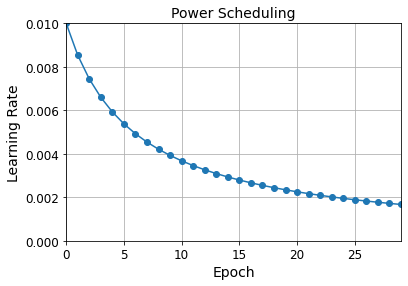

In [ ]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

2) Piecewise constant scheduling

The function returns a 1-arg callable to compute the piecewise constant when passed the current optimizer step. This can be useful for changing the learning rate value across different invocations of optimizer functions.

Example: use a learning rate that's 1.0 for the first 100001 steps, 0.5 for the next 10000 steps, and 0.1 for any additional steps.

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
##Train the model at 30 Epochs and see the result
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 30
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8418 - accuracy: 0.7597 - val_loss: 0.8232 - val_accuracy: 0.7786 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8952 - accuracy: 0.7385 - val_loss: 0.6581 - val_accuracy: 0.8056 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8647 - accuracy: 0.7464 - val_loss: 0.9398 - val_accuracy: 0.6638 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8849 - accuracy: 0.7320 - val_loss: 0.8515 - val_accuracy: 0.7238 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.9144 - accuracy: 0.7317 - val_loss: 0.8595 - val_accuracy: 0.7308 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5813 - accuracy: 0.8181 - val_loss: 0.6391 - val_accuracy: 0.8296 - lr: 0.0050
Epoch 7/30
1719/1719 [==============================] - 9

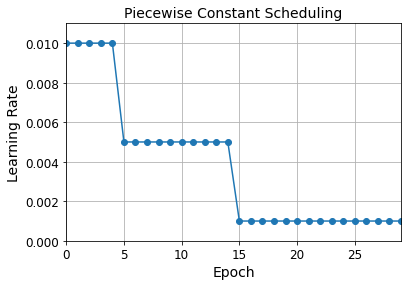

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

3) Performance Scheduling

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 30
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5931 - accuracy: 0.8065 - val_loss: 0.4398 - val_accuracy: 0.8558 - lr: 0.0200
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4917 - accuracy: 0.8403 - val_loss: 0.5223 - val_accuracy: 0.8488 - lr: 0.0200
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5129 - accuracy: 0.8420 - val_loss: 0.4830 - val_accuracy: 0.8548 - lr: 0.0200
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5083 - accuracy: 0.8479 - val_loss: 0.4766 - val_accuracy: 0.8548 - lr: 0.0200
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5107 - accuracy: 0.8479 - val_loss: 0.5483 - val_accuracy: 0.8300 - lr: 0.0200
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5060 - accuracy: 0.8529 - val_loss: 0.5157 - val_accuracy: 0.8486 - lr: 0.0200
Epoch 7/30
1719/1719 [==============================] - 6s

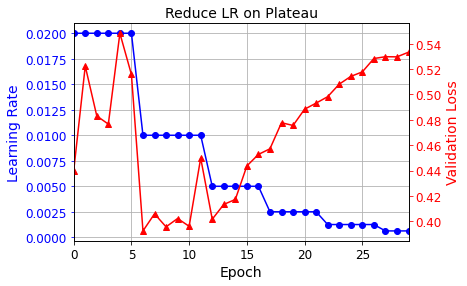

In [ ]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### Regularization


---

$\ell_1$ and $\ell_2$ regularization

In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [ ]:
# Defining, compile and train thje model at 10 Epochs
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7017 - accuracy: 0.8327 - val_loss: 0.6988 - val_accuracy: 0.8340
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6950 - accuracy: 0.8365 - val_loss: 0.6728 - val_accuracy: 0.8466
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6897 - accuracy: 0.8373 - val_loss: 0.6622 - val_accuracy: 0.8502
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6872 - accuracy: 0.8378 - val_loss: 0.6614 - val_accuracy: 0.8498
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6858 - accuracy: 0.8399 - val_loss: 0.6583 - val_accu

######**Gradient** **Clipping**

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3,clipvalue=1.0),
              metrics=["accuracy"])

In [ ]:
# fitting the model at 15 epochs
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0346 - accuracy: 0.6739 - val_loss: 0.6680 - val_accuracy: 0.7884
Epoch 2/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6757 - accuracy: 0.7819 - val_loss: 0.5537 - val_accuracy: 0.8212
Epoch 3/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5961 - accuracy: 0.8021 - val_loss: 0.4996 - val_accuracy: 0.8352
Epoch 4/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5456 - accuracy: 0.8176 - val_loss: 0.4655 - val_accuracy: 0.8458
Epoch 5/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5140 - accuracy: 0.8250 - val_loss: 0.4419 - val_accuracy: 0.8510
Epoch 6/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4915 - accuracy: 0.8309 - val_loss: 0.4237 - val_accuracy: 0.8540
Epoch 7/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4741 - accuracy: 0.8375 - val_loss: 0.4103 - val_ac

#####Batch Normalization

In [ ]:
# A batch Normalization layer added to stabilize the neurons
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
# fitting the model at 15 epochs
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 10s 6ms/step - loss: 1.0199 - accuracy: 0.6861 - val_loss: 0.6611 - val_accuracy: 0.7864
Epoch 2/15
1719/1719 [==============================] - 9s 6ms/step - loss: 0.6609 - accuracy: 0.7862 - val_loss: 0.5478 - val_accuracy: 0.8196
Epoch 3/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5857 - accuracy: 0.8046 - val_loss: 0.4968 - val_accuracy: 0.8332
Epoch 4/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5370 - accuracy: 0.8190 - val_loss: 0.4662 - val_accuracy: 0.8410
Epoch 5/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5053 - accuracy: 0.8278 - val_loss: 0.4438 - val_accuracy: 0.8498
Epoch 6/15
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4845 - accuracy: 0.8330 - val_loss: 0.4278 - val_accuracy: 0.8526
Epoch 7/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4692 - accuracy: 0.8377 - val_loss: 0.4140 - val_accur

#####Early Stopping

In [ ]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

###Optimizers

In [ ]:
# Adams Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
#Nadam Optimizer
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
#RMSProp Optimizer
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
#Adamax Optimizer
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

##Reference:
#####https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb